In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des données

In [11]:
# lister les jeux de données de la bibliothèque Seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [12]:
# importer un jeu de données
dataframe = sns.load_dataset("titanic")
# afficher les 5 premières lignes
dataframe.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


On peut remarquer des rédondences notamment les colonnes **survived**  et **alive** donnent la même information bien que l'encodage serait différent.

In [13]:
# suppressions des rédondences (axis = 1 pour supprimmer les colonnes)
dataframe = dataframe.drop(["who", "alive", "embarked", "class", "deck", "alone"], axis = 1)
dataframe.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,True,Southampton
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,False,Southampton
3,1,1,female,35.0,1,0,53.1000,False,Southampton
4,0,3,male,35.0,0,0,8.0500,True,Southampton


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


# Visualisation des données : 


<Axes: xlabel='age', ylabel='Count'>

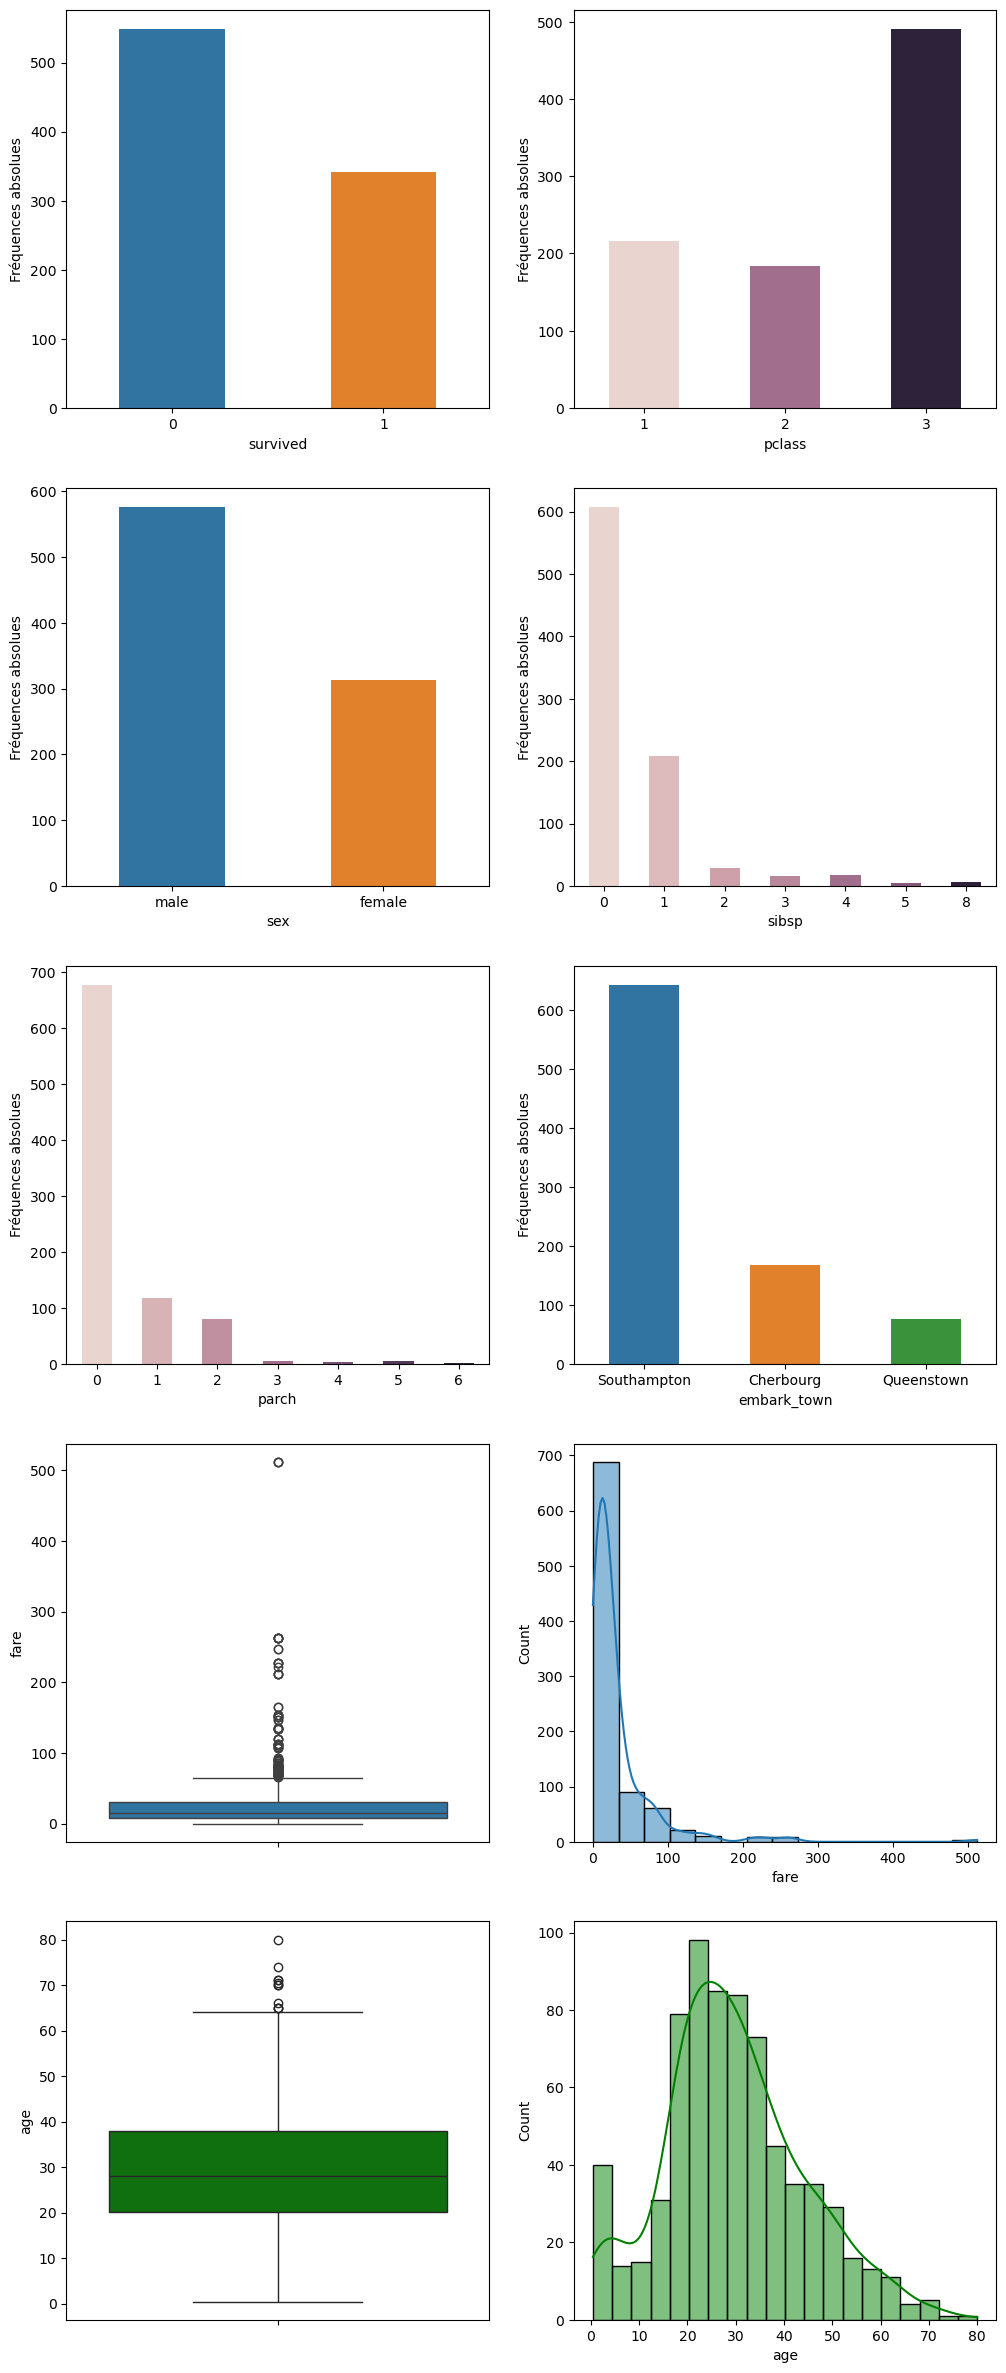

In [15]:
# visualiser chaque colonne de la data frame
fig, axes = plt.subplots(5, 2, figsize = (12, 30))
# les variables catégorielles
# les survivants
sns.countplot(x = "survived", data = dataframe, ax = axes[0,0], hue = "survived", legend = False, width = 0.5)
# la classe du passager
sns.countplot(x = "pclass", data = dataframe, ax = axes[0,1], hue = "pclass", legend = False, width = 0.5)
# le sex : male (homme) ou female (femme)
sns.countplot(x = "sex", data = dataframe, ax = axes[1,0], hue = "sex", legend = False, width = 0.5)
# les nombres des frères/soeurs/conjoints (0 : voyageur seul)
sns.countplot(x = "sibsp", data = dataframe, ax = axes[1,1], hue = "sibsp", legend = False, width = 0.5)
# les passagers ayant un parent/enfant (exclut les frères/soeurs/conjoints) : True ou False
sns.countplot(x = "parch", data = dataframe, ax = axes[2,0], hue = "parch", legend = False, width = 0.5)
# La ville d'embraquement du passager
sns.countplot(x = "embark_town", data = dataframe, ax = axes[2,1], hue = "embark_town", legend = False, width = 0.5)
for i in range(3):
    for j in range (2):
        axes[i, j].set_ylabel("Fréquences absolues")

# Les variables quantitatices (numériques)
# Le prix du billet (en livres sterling)
sns.boxplot(y = "fare", data = dataframe, ax = axes[3, 0])
sns.histplot(x = "fare", data = dataframe, ax = axes[3, 1], kde = True, bins = 15)
# L'âge du passager (en années)
sns.boxplot(y = "age", data = dataframe, ax = axes[4, 0], color = "green")
sns.histplot(x = "age", data = dataframe, ax = axes[4, 1], kde = True, color = "green")

# Croisements des variables avec la variable cible (ici **'survived'**)

<Axes: xlabel='survived', ylabel='age'>

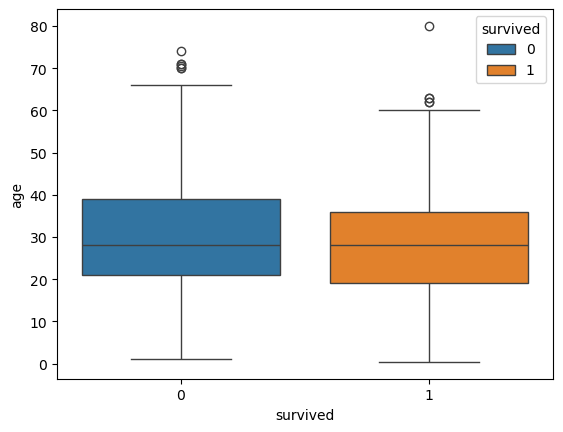

In [16]:
# Age (ordonnée) en fonction de la survie (abscisse)
sns.boxplot(x = "survived", y = "age", data = dataframe, hue = "survived")

La distribution des âges des personnes ayant survécues n'est pas très éloignées de celle des personne n'ayant pas survécues au nauffrage.

<Axes: xlabel='survived', ylabel='age'>

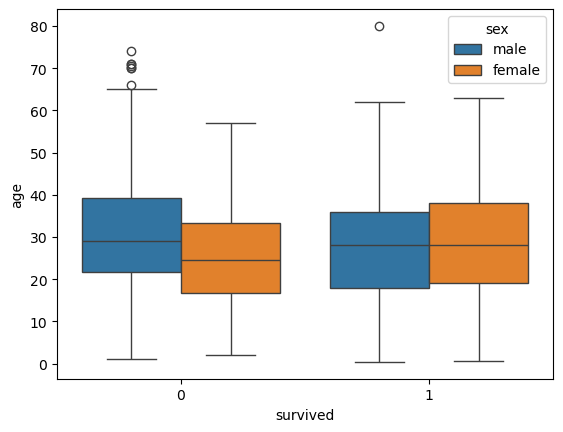

In [17]:
# Age (ordonnée) en fonction de la survie (abscisse) et du sexe
sns.boxplot(x = "survived", y = "age", data = dataframe, hue = "sex")

Les personnes n'ayant pas survécues étant majoritairement des hommes âgés entre 22 ans et 40 ans. Toutefois les survivants ont une distribution d'âge assez proche entre les hommes et les femmes

In [18]:
# La survie en fonction du nombre des frères/soeurs/conjoints (abscisse) et du sexe
# tableau croisé
tab = dataframe.pivot_table(index = "sibsp", columns = ["sex", "survived"], aggfunc = "size")
tab

sex      female          male      
survived      0      1      0     1
sibsp                              
0          37.0  137.0  361.0  73.0
1          26.0   80.0   71.0  32.0
2           3.0   10.0   12.0   3.0
3           7.0    4.0    5.0   NaN
4           4.0    2.0   11.0   1.0
5           1.0    NaN    4.0   NaN
8           3.0    NaN    4.0   NaN

<Axes: xlabel='sex-survived', ylabel='sibsp'>

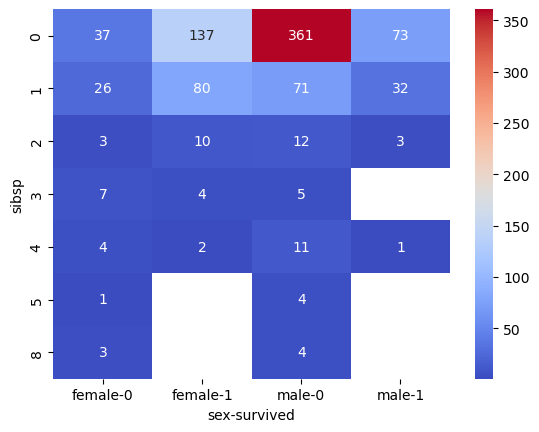

In [19]:
sns.heatmap(tab, annot = True, cmap = "coolwarm", fmt = ".0f")

#### Remarque : 
La mojorité d'homme n'ayant pas survécus était ceux voyageant seul

<Axes: xlabel='survived', ylabel='fare'>

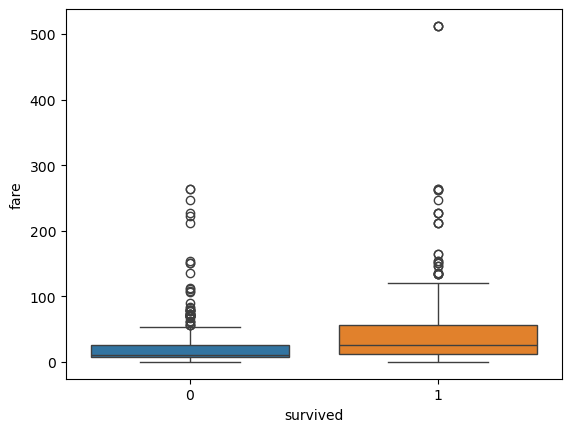

In [20]:
# Les personnes ayant survecus en fonction des tarifs des billets et la classe
# les prix des billets
sns.boxplot(x = "survived", y = "fare", data = dataframe, hue = "survived", legend = False)

<Axes: xlabel='survived', ylabel='fare'>

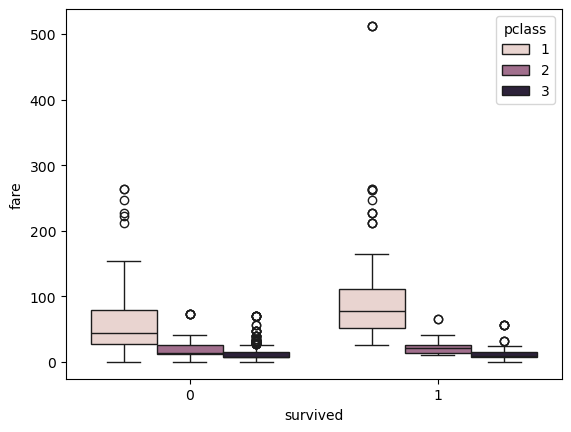

In [21]:
# la classe du passager
sns.boxplot(x = "survived", y = "fare", data = dataframe, hue = "pclass", legend = True)

# Nettoyage des données

## 1. Les Valeurs manquantes

In [22]:
# isna() : renvoie True si la cellule est une valeur NaN (not a number) et False sinon.
# combiner à sum() cela permet d'afficher le nombre des valeurs manquantes pour chaque colonne
dataframe.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
dtype: int64

### Imputation par la moyenne ou la médiane (variables quantitatives) : 
remplacer les valeurs manquantes par une valeur. La variable ***quantitative*** doit admettre une distribution normale

<Axes: xlabel='age', ylabel='Count'>

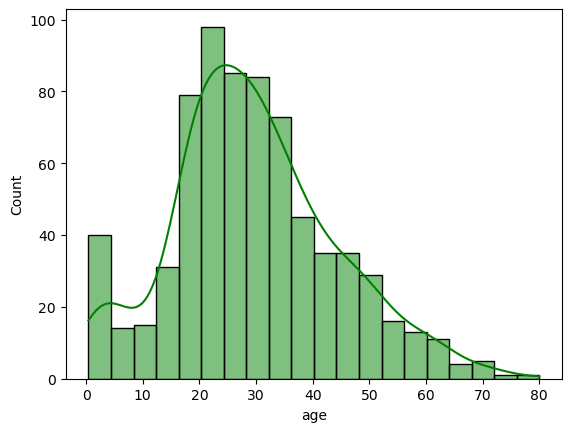

In [23]:
# distribution normale visuelle (avec le KDE de l'histogramme)
sns.histplot(x = "age", data = dataframe, kde = True, color = "green")

In [24]:
# distribution normale par le test de Shapiro-Wilk (test de niveau 95%)
from scipy.stats import shapiro
# suppression des valeurs manquantes (dans une série avant le test)
data_test = dataframe["age"].dropna()
stat, p_valeur = shapiro(data_test)
print(f"la statistique de test W = {stat:.3f} et  la p-valeur est : {p_valeur:.10f}")
if p_valeur > 0.05:
    print("La distribution est probablement normale")
else :
    print("La distribution n'est pas celle de la loi normale")

la statistique de test W = 0.981 et  la p-valeur est : 0.0000000734
La distribution n'est pas celle de la loi normale


**Remarque** : Si la **statistique de test (W)** est proche de **1** alors la distrbution est proche de la loi normale et lorsque **W** est proche **0** alors la s'éloigne de la normalité.
Toutefois, **cela n'est pas suffisant** : Tout dépendra de **la p-valeur > alpha** (alpha : risque de première espèce fixé à l'avance)

In [25]:
# vérification de la normalité (distribution) par les coéfficients d'asymétrie (skewness) et d'aplatissement (Kurtosis)
skewness = dataframe["age"].skew()
print ("Le coéfficient d'asymétrie (skewness) : ", round(skewness, 3))
kurtosis = dataframe["age"].kurtosis()
print ("Le coéfficient d'aplatissement (kurtosis) : ", round(kurtosis, 3))

Le coéfficient d'asymétrie (skewness) :  0.389
Le coéfficient d'aplatissement (kurtosis) :  0.178


**Remarques:**
- Le **Skewness** : asymétrie
  1. skewness proche de 0 en valeur absolue : distribution **presque symétrique** proche de la gaussienne centrée réduite. On peut donc remplacer les valeurs manquantes par **la moyenne**.
  2. skewness > 0 : distribution **asymétrique à droite** (queue vers les grandes valeurs). Il y'a plusieurs valeurs extrêmes (outliers), .donc la **médiane** conviendrait.
  3. skewness < 0 : distribution **asymétrique à gauche** (queue vers les petites valeurs). Présence de plusieurs  **outliers** de faibles valeurs. La moyenne peut être influencée par les valeurs extrêmes basses, d'où l'usage de la **médiane**.
- Le **Kurtosis** : importance des valeurs extrêmes
  1. kurtosis proche de 3 : distribution  proche de la gaussienne centrée réduite. Usage de la **moyenne**
  2. kurtosis > 3 : distribution **plus pointue** (les valeurs extrêmes plus fréquente peuvent influencer la moyenne). Opter pour la **médiane**
  3. kurtosis < 3 : distribution **plus aplatie** (absence des pics intenses qui faussent le calcul). La **moyenne** peut être pertinente. 

In [26]:
# test de Kolmogorov - Smirnov (KS)
from scipy.stats import kstest, zscore
data_test = dataframe["age"].dropna()
# standardisation des valeurs
data_test = zscore(data_test)
# test KS
stat, p_valeur = kstest(data_test, "norm")
print(f"la statistique de test D = {stat:.3f} et  la p-valeur est : {p_valeur:.10f}")
if p_valeur > 0.05:
    print("La distribution est probablement normale")
else :
    print("La distribution n'est pas celle de la loi normale")

la statistique de test D = 0.065 et  la p-valeur est : 0.0049634719
La distribution n'est pas celle de la loi normale


La statistique de test **D** du test KS est la plus grande distance entre la **fonction de répartion empirique** et la **fonction de répartition de la gaussienne centrée réduite**. Donc des faibles valeurs de D pourraient suggérer une distribution proche de la loi normale et des valeurs élevées de D, un éloignement de la distribution normale. Toutefois, **la p-valeur** permet de conclure sur l'hypothèse de normalité.

In [27]:
# test d'Agostino - Pearson
from scipy.stats import normaltest
data_test = dataframe["age"].dropna()
stat, p_valeur = normaltest(data_test)
print(f"la statistique d'Agostino = {stat:.3f} et  la p-valeur est : {p_valeur:.10f}")
if p_valeur > 0.05:
    print("La distribution est probablement normale -> La moyenne convient comme valeur d'imputation")
else :
    print("La distribution n'est pas celle de la loi normale -> La médiane est plus adaptée comme valeur d'imputation")

la statistique d'Agostino = 18.105 et  la p-valeur est : 0.0001170960
La distribution n'est pas celle de la loi normale -> La médiane est plus adaptée comme valeur d'imputation


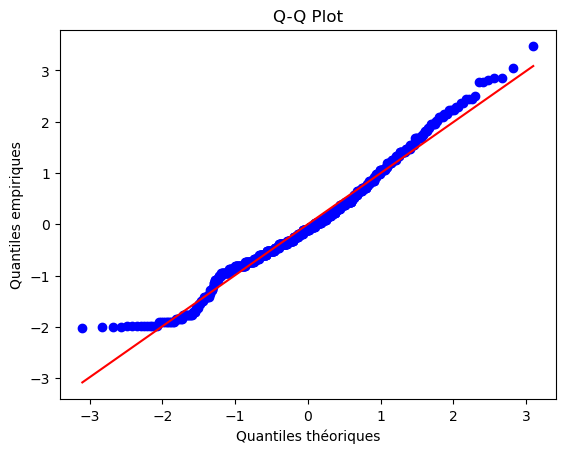

In [28]:
from scipy import stats
# la méthode Q - Q plot
data_test = dataframe["age"].dropna()
# standardisation des données
data_test = zscore(data_test)
# Q-Q plot
stats.probplot(data_test, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles empiriques")
plt.show()

- x = $F^{-1}$(p) où p appartient à \[O.01, 0.02, ..., 0,99] et $F^{-1}$, **la bijection réciproque de la fonction de répartition de la loi normale** (fonction quantile)
- y = Q(p), le même p utilisé pour le calcul de x, et Q est la **fonction quantile de la distribution empirique**
- **Alignement sur la diagonale** : distribution proche de la loi normale
- **Courbe en S** : distribution **asymétrique**
- **Points éloignés aux extrémités** : présence des valeurs extrêmes
- **Déviation vers le haut ou vers le bas** : queue de distribution étendue

#### Remplacement des valeurs manquantes : 
Veuillez à ce que la valeur qui remplacera la valeur des données manquantes **ne modifie pas significativement la variance** (ou écart-type, std : standart deviation) des données.

In [29]:
dataframe.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# imputation par la moyenne
data_moyenne = dataframe.fillna(value = {"age" : dataframe["age"].mean()})
print(f" l'écart-type passe de : {dataframe["age"].std(): .3f} à {data_moyenne["age"].std():.3f}")

 l'écart-type passe de :  14.526 à 13.002


In [31]:
# imputation par la médiane
data_moyenne = dataframe.fillna(value = {"age" : dataframe["age"].median()})
print(f" l'écart-type passe de : {dataframe["age"].std(): .3f} à {data_moyenne["age"].std():.3f}")

 l'écart-type passe de :  14.526 à 13.020


In [32]:
# Après les tests de normalité vu précédemment, la médiane est plus adaptée
dataframe.fillna(value = {"age" : dataframe["age"].median()}, inplace = True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [33]:
dataframe.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    2
dtype: int64

### Imputation par le mode (variable catégorielle) : 
la modilité de plus grande fréquence

In [34]:
# les fréquences absolues
dataframe["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [35]:
# les fréquences relatives
dataframe["embark_town"].value_counts(normalize = True)

embark_town
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: proportion, dtype: float64

In [36]:
dataframe.fillna(value = {"embark_town" : "Southampton"}, inplace = True)
dataframe.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
dtype: int64

## 2. Les valeurs aberrantes (outliers)

<Axes: ylabel='age'>

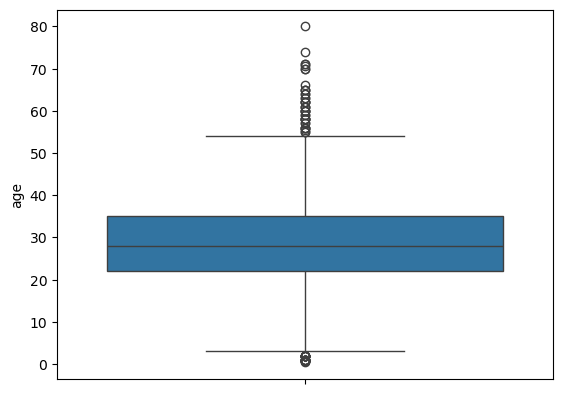

In [37]:
sns.boxplot(dataframe["age"])

In [38]:
# la détection des valeurs aberrantes par la méthode IQR (InterQuartile Range)
data_test = dataframe["age"].dropna()
# calcul des quartiles
Q1 = np.percentile(data_test, 25) # premier quartile (> 25% des valeurs)
Q3 = np.percentile(data_test, 75) # troisième quartile (> 75% des valeurs)
IQR = Q3 - Q1
print("L'intervale interquartile est: ", IQR)

L'intervale interquartile est:  13.0


In [39]:
outliers = dataframe[(dataframe["age"] < Q1 - 1.5 * IQR) | (dataframe["age"] > Q3 + 1.5 * IQR)]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
7,0,3,male,2.00,3,1,21.0750,False,Southampton
11,1,1,female,58.00,0,0,26.5500,False,Southampton
15,1,2,female,55.00,0,0,16.0000,False,Southampton
16,0,3,male,2.00,4,1,29.1250,False,Queenstown
33,0,2,male,66.00,0,0,10.5000,True,Southampton
...,...,...,...,...,...,...,...,...,...
827,1,2,male,1.00,0,2,37.0042,False,Cherbourg
829,1,1,female,62.00,0,0,80.0000,False,Southampton
831,1,2,male,0.83,1,1,18.7500,False,Southampton
851,0,3,male,74.00,0,0,7.7750,True,Southampton


In [40]:
# fonction pour les outliers avec la méthode IQR : (dataframe, etiquetteVariable) -> dataframeOutliers
def find_outliers(data, variable_name):
    Q1 = data[variable_name].quantile(0.25)
    Q3 = data[variable_name].quantile(0.75)
    return data[(data[variable_name] < Q1 - 1.5 * (Q3 - Q1)) | (data[variable_name] > Q3 + 1.5 * (Q3 - Q1))]


In [41]:
find_outliers(dataframe, "age").sort_values("age")

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
803,1,3,male,0.42,0,1,8.5167,False,Cherbourg
755,1,2,male,0.67,1,1,14.5000,False,Southampton
469,1,3,female,0.75,2,1,19.2583,False,Cherbourg
644,1,3,female,0.75,2,1,19.2583,False,Cherbourg
831,1,2,male,0.83,1,1,18.7500,False,Southampton
...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,True,Queenstown
96,0,1,male,71.00,0,0,34.6542,True,Cherbourg
493,0,1,male,71.00,0,0,49.5042,True,Cherbourg
851,0,3,male,74.00,0,0,7.7750,True,Southampton


In [42]:
find_outliers(dataframe, "fare").sort_values("fare")

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
336,0,1,male,29.0,1,0,66.6000,True,Southampton
151,1,1,female,22.0,1,0,66.6000,False,Southampton
369,1,1,female,24.0,0,0,69.3000,False,Cherbourg
641,1,1,female,24.0,0,0,69.3000,False,Cherbourg
846,0,3,male,28.0,8,2,69.5500,True,Southampton
...,...,...,...,...,...,...,...,...,...
27,0,1,male,19.0,3,2,263.0000,True,Southampton
341,1,1,female,24.0,3,2,263.0000,False,Southampton
679,1,1,male,36.0,0,1,512.3292,True,Cherbourg
737,1,1,male,35.0,0,0,512.3292,True,Cherbourg


<Axes: ylabel='fare'>

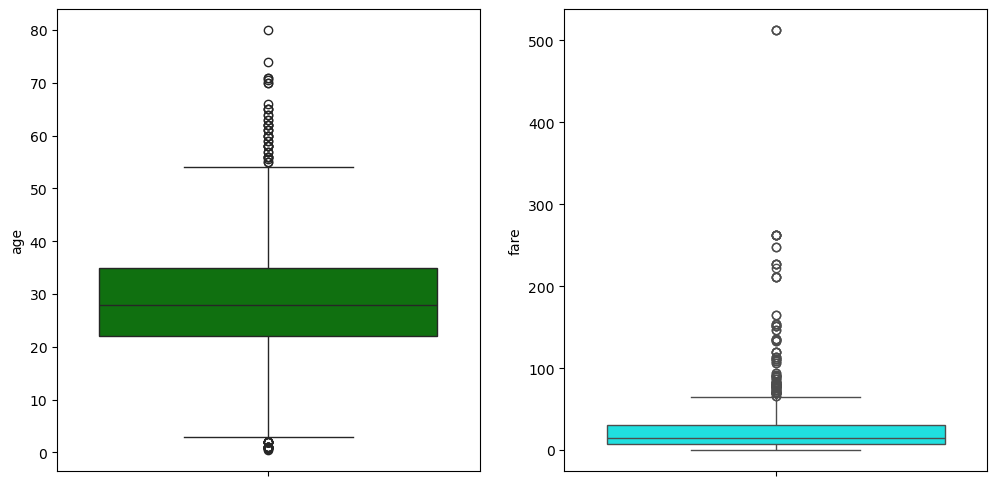

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.boxplot(dataframe["age"], ax = axes[0], color = 'green')
sns.boxplot(dataframe["fare"], ax = axes[1], color = 'cyan')

In [44]:
# détection des outliers par le zscore
data_zscore = dataframe.copy()
data_zscore = data_zscore.dropna(subset = ["age"])
data_zscore["age"] = zscore(data_zscore["age"])
data_zscore[abs(data_zscore["age"] > 3)]

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
96,0,1,male,3.199906,0,0,34.6542,True,Cherbourg
116,0,3,male,3.161481,0,0,7.7500,True,Queenstown
493,0,1,male,3.199906,0,0,49.5042,True,Cherbourg
630,1,1,male,3.891554,0,0,30.0000,True,Southampton
672,0,2,male,3.123056,0,0,10.5000,True,Southampton
745,0,1,male,3.123056,1,1,71.0000,True,Southampton
851,0,3,male,3.430455,0,0,7.7750,True,Southampton


- **L'IQR** : (Interquartile Range) est une approche non-paramétrique qui ne dépend pas de la distribution des données. Il identifie les valeurs aberrantes en fonction des quartiles et est plus sensible aux valeurs extrêmes, surtout si la distribution est asymétrique. **Idéale pour une distribution asymétrique**
  
- **Le Zscore** : est une approche basée sur la moyenne et l'écart-type, ce qui signifie qu’il fonctionne bien si les données suivent une distribution normale. Mais si la distribution est fortement asymétrique ou contient des valeurs extrêmes, le Z-score peut sous-estimer le nombre d’outliers. **Convient pour les distribution normales**.

## 3. Traitement des outliers

### A. Suppression : 
Pour les grandes tables où la suppression de quelques lignes n'occionne pas la perte d'informations.

### B. L'imputation : 
lorsque la suppression des lignes menerait à une perte d'informations. On peut remplacer les outliers par : 
- **la moyenne** : lorsque |skewness| < 0.3
- **la médiane** : lorsque 0.3 < |skewness| < 0.5
- **Q1 / Q3** : lorsque 0.6 < |skewness| < 1
- **log de la variable** : lorsque |skewness| < 1
- etc...

In [45]:
# Age des passagers
skewness = dataframe["age"].skew()
print ("Le coéfficient d'asymétrie (skewness) : ", round(skewness, 3))

Le coéfficient d'asymétrie (skewness) :  0.51


In [46]:
def imputation_IQR(data, variable_name, Q1 = True, Q3 = True):
    q1 = data[variable_name].quantile(0.25)
    q3 = data[variable_name].quantile(0.75)
    if Q1:
        inf = q1 - 1.5 * (q3 - q1)
        # modifier les valeurs trop faibles
        data.loc[data[variable_name] < inf, variable_name] = inf
    if Q3 : 
        sup = q3 + 1.5 * (q3 - q1)
        # modifier les valeurs trop élevées
        data.loc[data[variable_name] > sup, variable_name] = sup
    return data

<Axes: ylabel='age'>

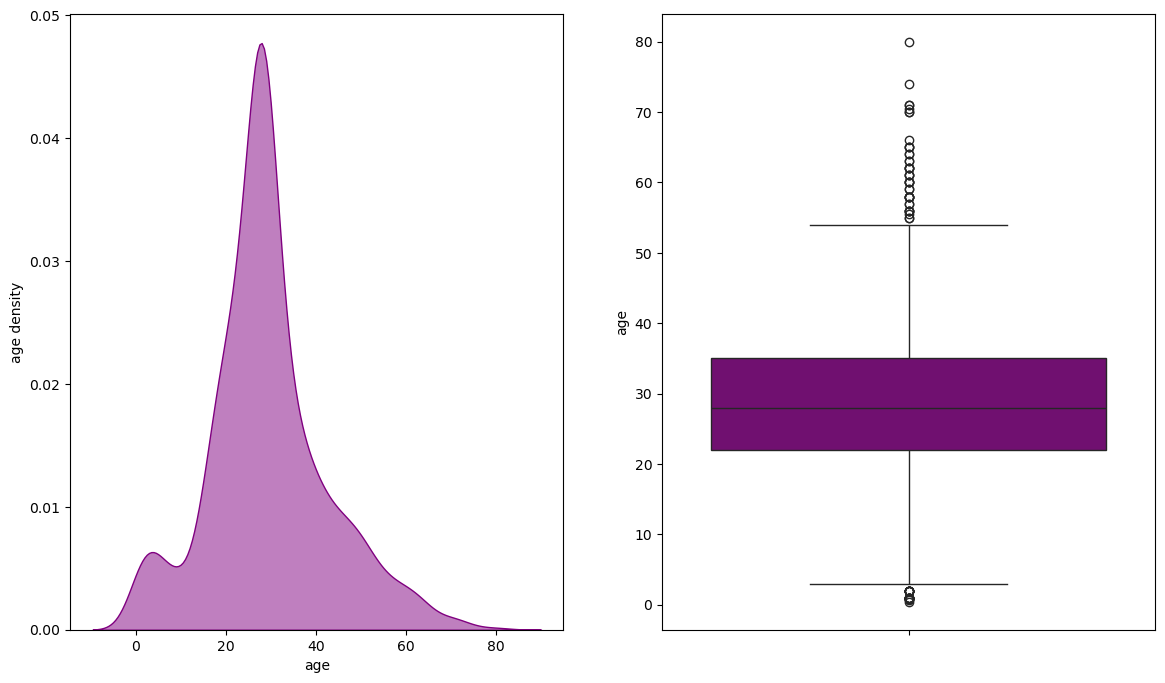

In [47]:
# Avant imputation des outliers
fig, axes = plt.subplots(1, 2, figsize = (14, 8))
sns.kdeplot(dataframe["age"], fill = True, color = "purple", alpha = 0.5, ax = axes[0])
axes[0].set_ylabel("age density")
sns.boxplot(y = dataframe["age"], ax = axes[1], color = "purple")

**Il y'a des valeurs extrêmes fortes et faibles**

<Axes: ylabel='age'>

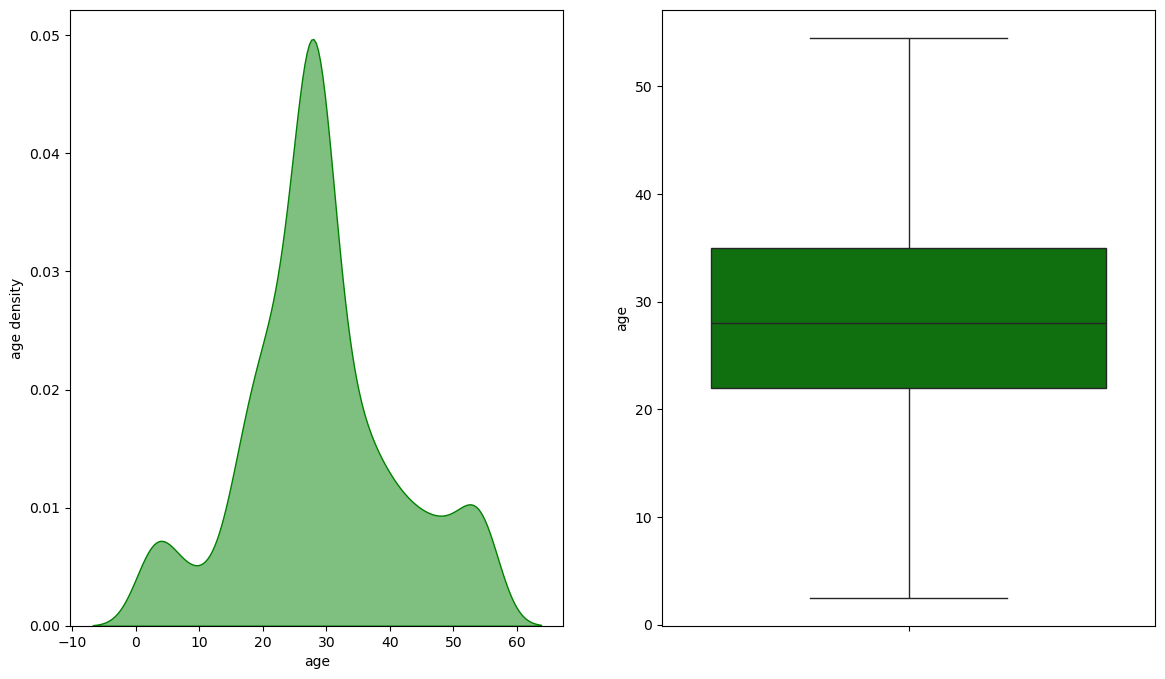

In [48]:
# Age après imputation des outliers
dataframe = imputation_IQR(dataframe, "age")
fig, axes = plt.subplots(1, 2, figsize = (14, 8))
sns.kdeplot(dataframe["age"], fill = True, color = "green", alpha = 0.5, ax = axes[0])
axes[0].set_ylabel("age density")
sns.boxplot(y = dataframe["age"], ax = axes[1], color = "green")

In [49]:
# Les prix des billets (fare) 
skewness = dataframe["fare"].skew()
print ("Le coéfficient d'asymétrie (skewness) : ", round(skewness, 3))

Le coéfficient d'asymétrie (skewness) :  4.787


<Axes: ylabel='fare'>

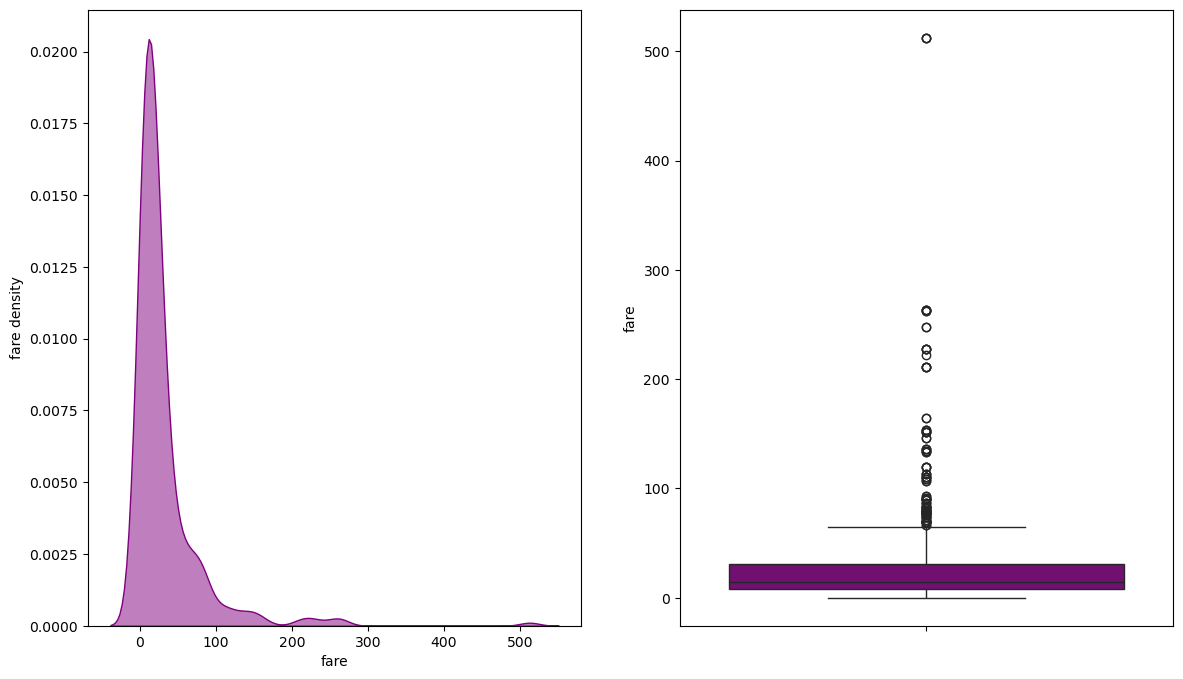

In [50]:
# Avant imputation des outliers
fig, axes = plt.subplots(1, 2, figsize = (14, 8))
sns.kdeplot(dataframe["fare"], fill = True, color = "purple", alpha = 0.5, ax = axes[0])
axes[0].set_ylabel("fare density")
sns.boxplot(y = dataframe["fare"], ax = axes[1], color = "purple")

**On remarque une distribution allongée vers la droite, doù uniquement les outliers de forte valeur**.

<Axes: ylabel='fare'>

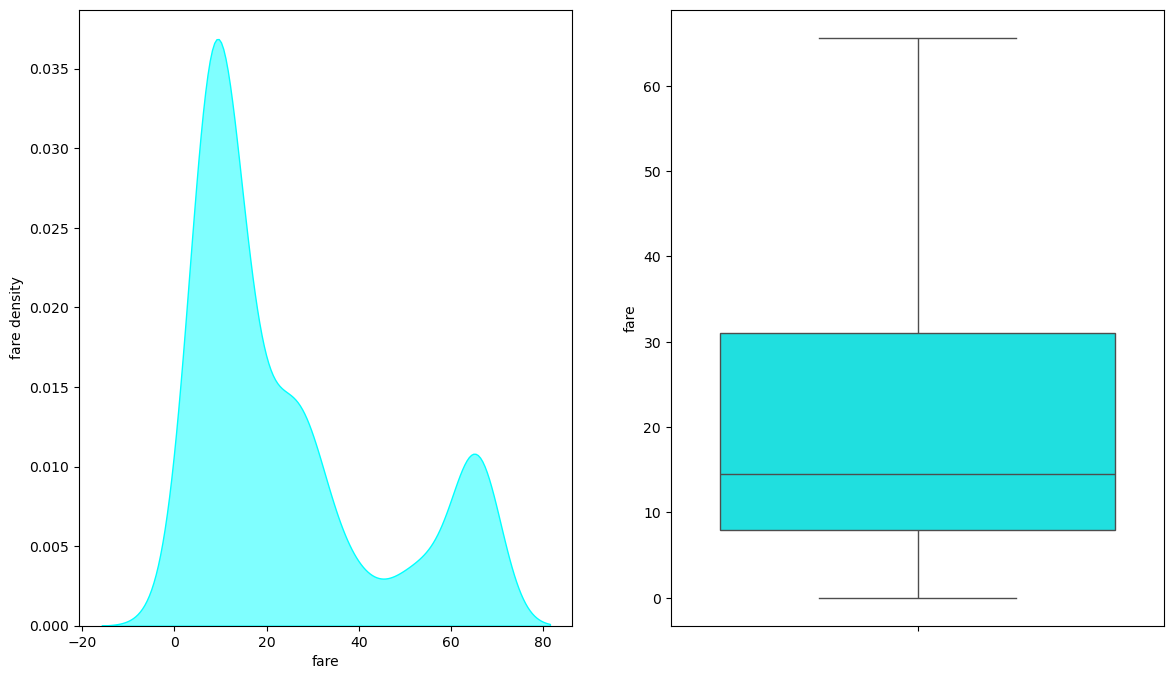

In [51]:
# Fare après imputation des outliers
dataframe = imputation_IQR(dataframe, "fare", Q1 = False, Q3 = True)
fig, axes = plt.subplots(1, 2, figsize = (14, 8))
sns.kdeplot(dataframe["fare"], fill = True, color = "cyan", alpha = 0.5, ax = axes[0])
axes[0].set_ylabel("fare density")
sns.boxplot(y = dataframe["fare"], ax = axes[1], color = "cyan")

### LA WINSORISATION :
Les valeurs extrêmes sont remplacées par des valeurs plus proches du centre de la distribution.
Un seuil est fixé, et toutes les valeurs au-dessus ou en dessous sont remplacées par les valeurs seuils (ex: 5e et 95e percentiles).
**Utilisation** : 
- from scipy.stats.mstats import winsorize
- data_winsorized = winsorize(data, limits=\[0.05, 0.05])
- **limits\[x, y]** où :
  - x : Proportion des valeurs les plus basses à remplacer par le quantile inférieur.
  - y : Proportion des valeurs les plus hautes à remplacer par le quantile supérieur.
- **Ici, 5% des valeurs les plus basses sont remplacées par le 5e percentile, et 5% des valeurs les plus hautes par le 95e percentile**.

# Préparation des données

In [52]:
dataframe.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,True,Southampton
1,1,1,female,38.0,1,0,65.6344,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,False,Southampton
3,1,1,female,35.0,1,0,53.1000,False,Southampton
4,0,3,male,35.0,0,0,8.0500,True,Southampton


## 1. Encodage des variables catégorielles

#### A. Le sexe :
Selon l'ordre alphabétique on a d'abord **female** puis **male**. Et on encode par des enters en partant de **0**. Par conséquent, **female = 0** et **male = 1**

In [54]:
dataframe["sex"] = dataframe["sex"].replace({"female" : 0, "male" : 1}).astype(int)
dataframe.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,22.0,1,0,7.2500,True,Southampton
1,1,1,0,38.0,1,0,65.6344,False,Cherbourg
2,1,3,0,26.0,0,0,7.9250,False,Southampton
3,1,1,0,35.0,1,0,53.1000,False,Southampton
4,0,3,1,35.0,0,0,8.0500,True,Southampton


#### B. La variable adult_male : 
L'encodage est optionnel car les booléens valent 0 pour False et 1 pour la valeur True

In [55]:
dataframe["adult_male"] = dataframe["adult_male"].astype("int")
dataframe.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,22.0,1,0,7.2500,1,Southampton
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg
2,1,3,0,26.0,0,0,7.9250,0,Southampton
3,1,1,0,35.0,1,0,53.1000,0,Southampton
4,0,3,1,35.0,0,0,8.0500,1,Southampton


#### C. embark_town (variable catégorielle nominale) : 
On peut utiliser le **One-Hot Encoding**  avec la méthode **get_dummies()** de Pandas qui transforme chaque catégorie en une colonne qui contiendra des valeurs binaires (**1** si l'individu **appartient** à la catégorie et **0 sinon**). 

Avec le paramètre **drop_first = True**, on élimine la **colinéarité**. En effet, en considérant nos **3** modalités de départ, si **sur une ligne** la colonne de première modlité est à **1** alors on peut déduire les informations sur les colonnes des deux modalités restantes. 


De plus, si **sur une ligne** les colonnes de deux modalités sont à **0** alors on peut déduire que l'individu appartient à la **troisième** (dernnère) **catégorie**.

In [56]:
# Afficher les modalités de la variable embark_town
dataframe["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [57]:
# dataframe des catégories de la variable embark_town
embark_categories = pd.get_dummies(dataframe["embark_town"], drop_first = True).astype("int")
embark_categories

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [58]:
# concatener les deux dataframes (par les colonnes : axis = 1)
dataframe = pd.concat([dataframe, embark_categories], axis = 1)
dataframe.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0,1
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0,0
2,1,3,0,26.0,0,0,7.9250,0,Southampton,0,1
3,1,1,0,35.0,1,0,53.1000,0,Southampton,0,1
4,0,3,1,35.0,0,0,8.0500,1,Southampton,0,1


In [59]:
# Suppression de l'ancienne colonne embark_town
dataframe = dataframe.drop(columns = ["embark_town"])
dataframe.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,1
1,1,1,0,38.0,1,0,65.6344,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,1,0,1


## 2. Le Feature Engineering : 
Regrouper deux ou plusieurs variables en une seule dans le but de réduire les dimensions de la dataframe. Le cas de **ville** et **quartier** en une seule variable **localisation**, **jour**, **mois** et **année** en **date**, etc... 

In [60]:
# ici sibsp et parch en family : (frère/soeur/ conjoint et parent/enfant)
dataframe["family"] = dataframe["sibsp"] + dataframe["parch"]
# Suppression des anciennes colonnes sibsp et parch 
dataframe = dataframe.drop(columns = ["sibsp", "parch"], axis = 1)
dataframe.head()

,survived,pclass,sex,age,fare,adult_male,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,1,1
1,1,1,0,38.0,65.6344,0,0,0,1
2,1,3,0,26.0,7.9250,0,0,1,0
3,1,1,0,35.0,53.1000,0,0,1,1
4,0,3,1,35.0,8.0500,1,0,1,0


## 3. Division des données :
partitionner nos données en **3 ensembles** : 

1. d'**entraînement** (60 - 80%) : sert à ajuster les paramètres du modèle
2. de **Validation** (10 - 20%) : pour optimiser le modèle et prévenir le sur-apprentissage (overfitting)
3. de **Test** (10 - 20%) :  Utilisé uniquement à la fin pour évaluer les performances réelles du modèle sur des données jamais vues.
Toutefois, il est courant de diviser en deux sous ensembles :  d'**entraînement** et de **Test**.

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
# séparation des variables expliicatives (indépandantes) X et de la variable expliquée (cible) y
X = dataframe.drop("survived", axis = 1)
y = dataframe["survived"]
# la racine pour la sépartion aléatoire
seed = 12
# division en données d'entraînement(60%) et de Test(40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify = y)
# divisions des 40% des données de test en données de validation et de test (20% des données totales pour chacun des deux sous ensembles)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = seed, stratify = y_test)
# 60% train, 20% val, 20% test

1. **seed** : permet de conserver la même répartition aléatoire à chaque exécution du code.
2. **test_size** : spécifie la proportion des données de test.
3. **stratify** : Si la variable cible (y) est **déséquilibrée**, une séparation aléatoire peut entraîner **une répartition inégale entre les ensembles**.
Avec stratify=y garantit que les proportions des classes restent identiques dans tous les sous-ensembles. Très utile pour les problèmes de classification, notamment si certaines classes sont sous-représentées. Sans stratify, un jeu de données contenant 90% de classe "A" et 10% de classe "B" pourrait être divisé avec des proportions incorrectes, ce qui fausserait l'entraînement du modèle.


In [65]:
# vérification de la proportion de la distribution des classes de la variables cible
y.value_counts(normalize = True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [66]:
# vérifier que les données d'entrainement conservent cette distribution
y_train.value_counts(normalize = True)

survived
0    0.616105
1    0.383895
Name: proportion, dtype: float64

In [67]:
# vérifier que les données de validation conservent cette distribution
y_val.value_counts(normalize = True)

survived
0    0.617978
1    0.382022
Name: proportion, dtype: float64

In [68]:
# vérifier que les données de test conservent cette distribution
y_test.value_counts(normalize = True)

survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64

## 4. La normalisation des doonnées : 
Normaliser les données est une étape clé en prétraitement des données, particulièrement en Machine Learning. Elle permet **d’uniformiser les valeurs afin d’éviter les biais dus aux différences d’échelle**.
####  Pourquoi normaliser les données ?

- Certaines variables ont des ordres de grandeur très différents → ex: un salaire (30,000€) et un âge (35 ans).
- Les modèles basés sur les distances (SVM, K-Means, réseaux neuronaux) sont très sensibles aux écarts d'échelle → une variable avec des grandes valeurs peut dominer le modèle.
- Faciliter la convergence des algorithmes de Machine Learning → En normalisant, le modèle apprend plus efficacement. **Sans normalisation, une variable à grande échelle peut influencer fortement les résultats du modèle.**

#### Quand faut-il normaliser ?

1. Si les **variables ont des unités différentes** → ex: température (°C), poids (kg), salaire (€).
2. Si on utilise un **modèle sensible aux écarts de valeurs** → SVM, K-Means, Réseaux Neuronaux.
3. Si les **distributions sont très asymétriques et étendues** → Ex: prix immobilier, revenus, durée de transactions.
4. Si les **valeurs contiennent des extrêmes** et que l’**apprentissage est perturbé** → Normalisation stabilise l’analyse.
   
**Les modèles basés sur les arbres (Random Forest, Decision Trees) ne nécessitent PAS de normalisation car ils se basent sur les séparations et non sur les distances.**

## 6. La gestion du déséquilibre des  : 
Il existe plusieurs méthodes :
- **Oversampling** : **ajout** d'instances synthétiques (artificielles) à la **classe minoritaire**
- **Undersampling** : **réduction** d'instances dans la classe **majoritaire**
- **Podération des classes** : **ajustement de l'influence de chaque classe** sur l'apprentissage
- **F1 - score** : **évaluation** de la précision en tenant compte du déséquilibre.
Les deux premières méthodes sont les plus utilisées.

### A. Sur-échantillonnage (Oversampling)

In [69]:
from sklearn.utils import resample

In [71]:
# concaténer les deux dataframes d'entraînement en une seule
data = X_train
data["survived"] = y_train.values
data

,pclass,sex,age,fare,adult_male,Queenstown,Southampton,family,survived
283,3,1,19.0,8.0500,1,0,1,0,1
653,3,0,28.0,7.8292,0,1,0,0,1
222,3,1,51.0,8.0500,1,0,1,0,0
147,3,0,9.0,34.3750,0,0,1,4,0
729,3,0,25.0,7.9250,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
504,1,0,16.0,65.6344,0,0,1,0,1
556,1,0,48.0,39.6000,0,0,0,1,1
200,3,1,28.0,9.5000,1,0,1,0,0
591,1,0,52.0,65.6344,0,0,0,1,1


In [73]:
# afficher les proportions déséquilibrées des classes
data["survived"].value_counts(normalize = True)

survived
0    0.616105
1    0.383895
Name: proportion, dtype: float64

In [75]:
# diviser en deux dataframes selon les classes de la variable d'intérêt
minority = data[data["survived"] == 1] # les survivants sont minoritaires
minority.shape

(205, 9)

In [76]:
majority = data[data["survived"] == 0] # les personnes n'ayant pas survécu
majority.shape

(329, 9)

In [79]:
# augmenter par bootstraping le nombre d'observations de la classe minoritaire jusqu'à atteindre la taille de la classe majoritaire
minority = resample(minority, replace = True, n_samples = len(majority))
# replace = True : pour éffectuer des tirages avec remises (bootstrap)
# n_samples : Le nombre d'observations souhaité pour l'échantillon bootstrappé
print(minority.shape == majority.shape)

True


**Le Bootstraping** : est une technique statistique qui consiste à rééchantillonner un dataset avec remise (replacement). Elle permet d’estimer la distribution d’un paramètre ou d’un modèle en créant plusieurs sous-échantillons aléatoires à partir des données originales.

In [81]:
# concatener les dataframes de deux classes en une seule
data = pd.concat([minority, majority], axis = 0)
data

,pclass,sex,age,fare,adult_male,Queenstown,Southampton,family,survived
708,1,0,22.0,65.6344,0,0,1,0,1
630,1,1,54.5,30.0000,1,0,1,0,1
520,1,0,30.0,65.6344,0,0,1,0,1
247,2,0,24.0,14.5000,0,0,1,2,1
68,3,0,17.0,7.9250,0,0,1,6,1
...,...,...,...,...,...,...,...,...,...
35,1,1,42.0,52.0000,1,0,1,1,0
739,3,1,28.0,7.8958,1,0,1,0,0
882,3,0,22.0,10.5167,0,0,1,0,0
840,3,1,20.0,7.9250,1,0,1,0,0


In [83]:
# mélanger les lignes aléatoirement
data = data.sample(frac = 1, random_state = 12).reset_index(drop = True)
# frac = 1 : pour prendre 100% des lignes
data

,pclass,sex,age,fare,adult_male,Queenstown,Southampton,family,survived
0,1,1,45.0,65.6344,1,0,1,1,0
1,3,1,28.0,8.0500,1,0,1,0,0
2,2,0,34.0,32.5000,0,0,1,2,1
3,3,1,28.0,7.8958,1,0,1,0,0
4,3,0,28.0,7.8792,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
653,1,1,42.0,52.5542,1,0,1,1,1
654,2,1,52.0,13.0000,1,0,1,0,0
655,3,0,2.5,11.1333,0,0,1,2,1
656,3,1,27.0,6.9750,1,0,1,0,1


In [87]:
# diviser en variables explicatives et variable cible
X_train_over = data.drop("survived", axis = 1)
y_train_over = data["survived"]
X_train_over

,pclass,sex,age,fare,adult_male,Queenstown,Southampton,family
0,1,1,45.0,65.6344,1,0,1,1
1,3,1,28.0,8.0500,1,0,1,0
2,2,0,34.0,32.5000,0,0,1,2
3,3,1,28.0,7.8958,1,0,1,0
4,3,0,28.0,7.8792,0,1,0,0
...,...,...,...,...,...,...,...,...
653,1,1,42.0,52.5542,1,0,1,1
654,2,1,52.0,13.0000,1,0,1,0
655,3,0,2.5,11.1333,0,0,1,2
656,3,1,27.0,6.9750,1,0,1,0


In [88]:
y_train_over

0      0
1      0
2      1
3      0
4      1
      ..
653    1
654    0
655    1
656    1
657    0
Name: survived, Length: 658, dtype: int64

### B. Le Sous-échantillonnage (Undersampling)

Appliquer les mêmes étapes et lors de l'utilisation de la méthode **resample**, le premier argument sera la dataframe de la classe **mojoritaire**, le paramètre **replace** sera fixé à **False** pour effectuer des **tirages sans remises**, et **n_samples** sera le nombre des lignes de la dataframe de la classe **minoritaire**.